# Data Visualization with Pandas Demo
#### Further Documentation
https://pandas.pydata.org/docs/

## Introduction

Pandas is an open-sourced library providing data structure and data analysis tools for the Python language. This notebook aims to demonstrate some of the data visualization capabilities of this library. The graph-plotting is actually handled by another library, called **matplotlib**, but accessing it through Pandas simplifies the entire data visualization process. The main focus of this demo is on the set of methods that can be used with a Pandas DataFrame to plot various graphs from the data at hand. 

## Setting Up

You can install the libraries using pip or conda.

In [1]:
# install pandas
%matplotlib inline
! pip install --user pandas
! pip install --user numpy
! pip install --user matplotlib

Having installed the libraries, you can import them as follows. The first line (%matplotlib inline) is specific to Jupyter Notebooks and ensures that the figures show up properly when the cell is run.

In [2]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set display row/column to show all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

We can now read the sample data into a dataframe. The sample data is taken from the UK Met Office and shows the maximum and minimum temperature, the rainfall and the number of hours of sunlight for each month in 2018.

In [3]:
# read sample csv data into dataframe
weather = pd.read_csv('SampleData_Weather.csv')
print(weather)

    Year  Month  Tmax  Tmin  Rain    Sun
0   2018      1   9.7   3.8  58.0   46.5
1   2018      2   6.7   0.6  29.0   92.0
2   2018      3   9.8   3.0  81.2   70.3
3   2018      4  15.5   7.9  65.2  113.4
4   2018      5  20.8   9.8  58.4  248.3
5   2018      6  24.2  13.1   0.4  234.5
6   2018      7  28.3  16.4  14.8  272.5
7   2018      8  24.5  14.5  48.2  182.1
8   2018      9  20.9  11.0  29.4  195.0
9   2018     10  16.5   8.5  61.0  137.0
10  2018     11  12.2   5.8  73.8   72.9
11  2018     12  10.7   5.2  60.6   40.3


To gain more insight into a particular column, you can use the *describe()* method on the dataframe column name.

In [4]:
# describe the monthly rainfall
rain_data = weather.Rain.describe()
print(rain_data)

count    12.000000
mean     48.333333
std      24.630555
min       0.400000
25%      29.300000
50%      58.200000
75%      62.050000
max      81.200000
Name: Rain, dtype: float64


## Data Visualisation
#### 1D Line Graph

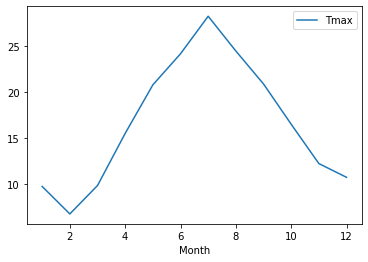

In [5]:
# plot max temp. vs month
weather.plot(kind='line', y='Tmax', x='Month')
plt.show()

# the following line of code achieves the same thing
# weather.plot.line(y=’Tmax’, x=’Month’)

We can plot multiple lines on the same graph.

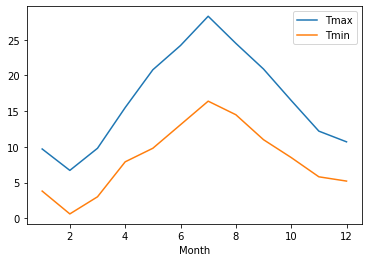

In [6]:
# plot max and min temp. vs month
weather.plot(y=['Tmax','Tmin'], x='Month')
plt.show()

We can also use the Pandas library to create a new column for the average temperature.

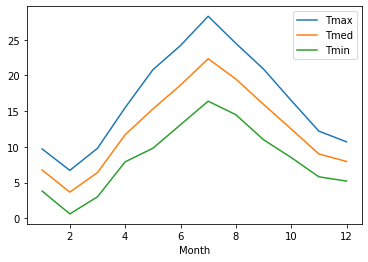

In [7]:
# plot max, min and ave. temp. vs month
weather['Tmed'] = (weather['Tmax'] + weather['Tmin'])/2

weather.plot(y=['Tmax','Tmed','Tmin'], x='Month')
plt.show()

#### Bar Chart

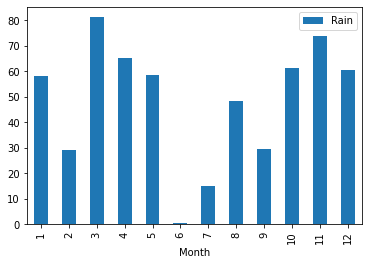

In [8]:
# lot rainfall vs month
weather.plot(kind='bar', y='Rain', x='Month')
plt.show()

# The following line of code achieves the same thing
# weather.plot.bar(y='Rain', x='Month')

Multiple bars.

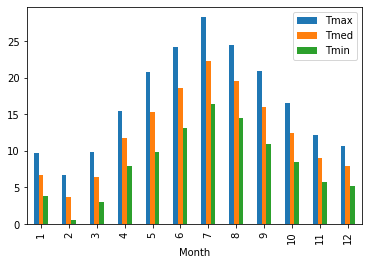

In [9]:
# plot max and min temp. vs month on a bar chart
weather.plot(kind='bar', y=['Tmax', 'Tmed','Tmin'], x='Month')
plt.show()

#### Scatter Plot

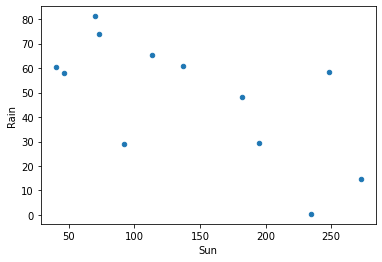

In [10]:
# scatter plot of rainfall vs sunlight
weather.plot(kind='scatter', x='Sun', y='Rain')
plt.show()

#### Pie Chart

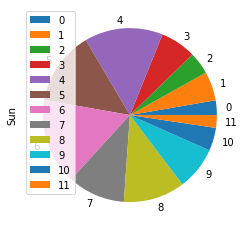

In [11]:
# pie chart of the number of hours of sunlight in each month
weather.plot(kind='pie', y='Sun')
plt.show()

#### Box Plot

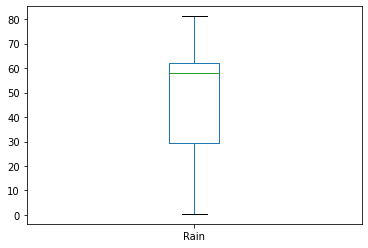

In [12]:
# box plot for the monthly rainfall
weather.plot.box(y='Rain')
plt.show()

The box itself represents the range of data between the 1st and 3rd quartiles. The green line is the median. The 'whiskers' extend to 1.5 times the interquartile range, which is the 3rd quartile minus the 1st quartile.

#### Histogram

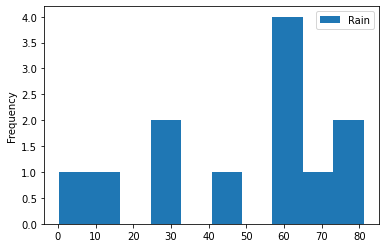

In [13]:
# histogram for the monthly rainfall
weather.plot(kind='hist', y='Rain')
plt.show()

You can also adjust the number of bins or more specifically with a list of numbers representing the boundaries of the bins.

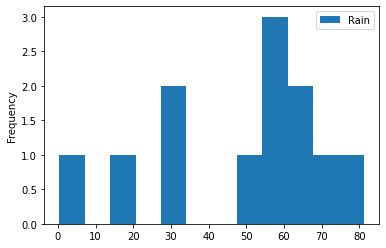

In [14]:
# histogram for the monthly rainfall with 12 bins
weather.plot(kind='hist', y='Rain', bins=12)
plt.show()

## Modifying the Plots

One can alter the layout and design of the plots to better visualise the data. Using the above pie chart as an example, the legend is too big and it is not showing the months, making the data hard to understand.

We can remove the legend and add the name of the months using the following code.

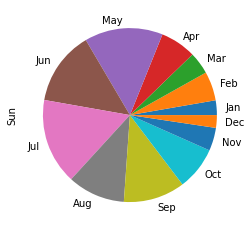

In [15]:
# remove legend
# add name of months
weather.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
weather.plot(kind='pie', y = 'Sun', legend=False)
plt.show()

## Multiple Charts

You can also create separate charts for each column of data. The following example shows separate line graphs of the four columns.

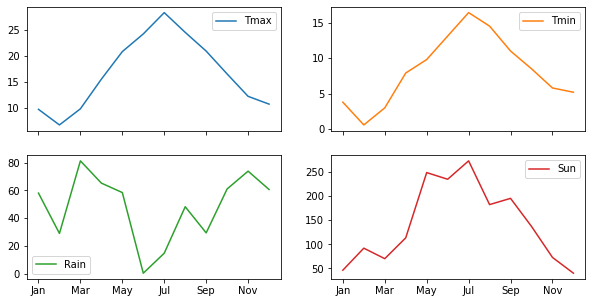

In [16]:
# multiple line charts 
weather.plot(y=['Tmax', 'Tmin','Rain','Sun'], subplots=True, layout=(2,2), figsize=(10,5))
plt.show()